<a href="https://colab.research.google.com/github/kiranraou/mediapipe/blob/master/DXC__AI_Machine_Learning_Model__Auto_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<< **DXC - ML Model for Auto Insurance Industry** >>

**Aim of the Project**

Build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.

**USE CASES**

1.Conquering Market Share:  *Capture market share by lowering the prices of the premium for the customers, who are least likely to claim*.

2.Risk Management:  *Charge the right premium from the customer, who is likely to claim insurance in the coming year*.

3.Smooth Processing: *Reduce the complexity of pricing models. Most of the transactions are happening online with larger customer attributes (thanks to the internet and social media). Harness the power of huge data to build complex ML models*.

4.Increased Profits: *As per industry estimate 1% reduction in the claim can boost profit by 10%. So, through the ML model, we can identify and deny the insurance to the driver who will make a claim. Thus, ensuring reduced claim outgo and increased profit*.


### Dataset Description
- 600k training data
- 57 features/data 
- In the train and test data
    - features that `belong to similar groupings` are tagged as such in the feature names (e.g., ind, reg, car, calc)
    - feature names include the 
        - postfix `bin` to indicate binary features 
        - postfix `cat` to indicate categorical features
        - without these designations are either `continuous or ordinal`
    - Values of `-1 indicate that the feature was missing` from the observation
    - the `target` column signifies whether a claim was filed for that policy holder.

Dataset Path: https://drive.google.com/file/d/18o9CQ2JnTxFJrkYfhwZmjk8FvWzrk6so/view?usp=sharing

---
 *Process Flow *

**EDA (Exploratory Data Analysis)**:Analyze the datasets to summarize their main characteristics (with visual methods). A statistical model can be used, primarily EDA can be used to see what the data can tell us beyond the formal modeling or hypothesis testing task.

**Machine Learning Modeling)** :After EDA, the modeling comes into the process. The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data. The term “ML model” refers to the model artifact that is created by the training process.

### Mounting Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Modules**

In [12]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Data Exploration
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [14]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
sns.set(color_codes=True, font_scale=1)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Scaling and Train Test Split
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Resampling Modules from sklearn
from sklearn.datasets import make_classification
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [17]:
# Machine Learning Models and Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [18]:
# To calculate the performace of the models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

**Load and Analyze the Dataset**

In [19]:
# Use this when running from Google Colab
train = pd.read_csv('/content/drive/MyDrive/DXC AI/train dataset.csv')

In [20]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [21]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


**[Exploratory Data Analysis]**

In [22]:
# Dimensionality of the DataFrame
print("Dimensionality of Dataset:")
print("- Number of Rows:\t{}".format(len(train.axes[0])))
print("- Number of Columns:\t{}".format(len(train.axes[1])))

Dimensionality of Dataset:
- Number of Rows:	595212
- Number of Columns:	59


In [23]:
# Checking for number of missing values in each column
train.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [24]:
print('Summary of the basic information about the DataFrame and its data:')
print('------------------------------------------------------------------\n')
print(train.info())

Summary of the basic information about the DataFrame and its data:
------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin

In [25]:
# Check and Drop for duplicates
train.drop_duplicates()
train.shape

(595212, 59)

In [26]:
# Unique values in Target columns
print('Unique values in the Target Column is: ', train.target.unique())

Unique values in the Target Column is:  [0 1]


In [27]:
print('Dimension of the Target Column is:', train.target.shape)

Dimension of the Target Column is: (595212,)


In [28]:
# object containing counts of unique values
unique_df = train.target.value_counts().rename_axis(
    'Unique Values').to_frame('Counts')
unique_df

,Counts
Unique Values,
0,573518
1,21694


In [29]:
tar_count = train.target.value_counts()
tar_count0 = tar_count[0] / train.shape[0] * 100
tar_count1 = tar_count[1] / train.shape[0] * 100
print('Target Column Data Distribution for (Zero & One):', tar_count0, tar_count1)

Target Column Data Distribution for (Zero & One): 96.3552482140817 3.6447517859182947


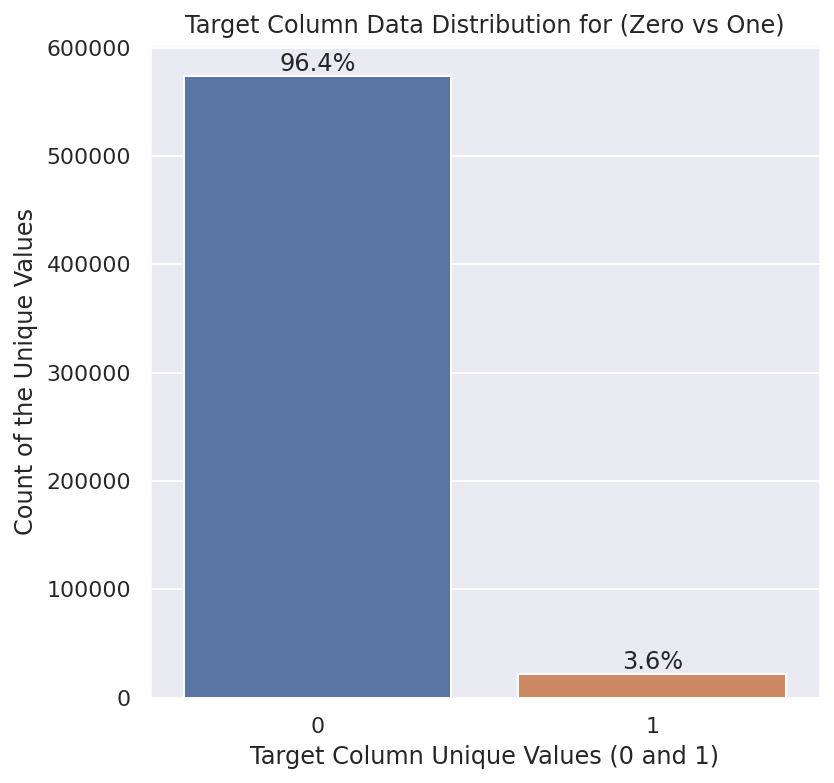

In [30]:
# Bar Plot with frequency percentage for Target column values (0 & 1)
ncount = len(train)

plt.figure(figsize=(6, 6))
ax = sns.countplot(train.target)
sns.set_palette("hls")

plt.title('Target Column Data Distribution for (Zero vs One)')
plt.xlabel('Target Column Unique Values (0 and 1)')
plt.ylabel('Count of the Unique Values')


for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom')  # set the alignment of the text

In [32]:
data = []

for i in train.columns:

    # Defining the feature type
    if 'bin' in i:
        ftype = 'binary'

    elif 'cat' in i:
        ftype = 'categorical'
        train[i] = train[i].astype(str)

    elif 'bin' not in i and train[i].dtype == float:
        ftype = 'interval'

    elif 'cat' not in i and train[i].dtype == float:
        ftype = 'interval'

    elif 'bin' not in i and train[i].dtype == int:
        ftype = 'ordinal'

    elif 'cat' not in i and train[i].dtype == int:
        ftype = 'ordinal'

    # Defining the data type
    dtype = train[i].dtype

    # Initialize keep to True for all variables except for id
    keep = True
    if i == 'id':
        keep = False

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'Col_Name': i,
        'Feature_Type': ftype,
        'Keep': keep,
        'Data_Type': dtype
    }
    data.append(f_dict)

train.replace({'-1': np.NaN, 'nan': np.nan}, inplace=True)

meta = pd.DataFrame(
    data, columns=['Col_Name', 'Feature_Type', 'Keep', 'Data_Type'])

meta.set_index('Col_Name', inplace=True)

meta.head()

,Feature_Type,Keep,Data_Type
Col_Name,,,
id,ordinal,False,int64
target,ordinal,True,int64
ps_ind_01,ordinal,True,int64
ps_ind_02_cat,categorical,True,object
ps_ind_03,ordinal,True,int64


In [33]:
# Count of variables per Role and Feature Type
ft_cnt = pd.DataFrame({'Count': meta.groupby(['Feature_Type'])[
                      'Data_Type'].size()}).reset_index()
ft_cnt

,Feature_Type,Count
0,binary,17
1,categorical,14
2,interval,10
3,ordinal,18


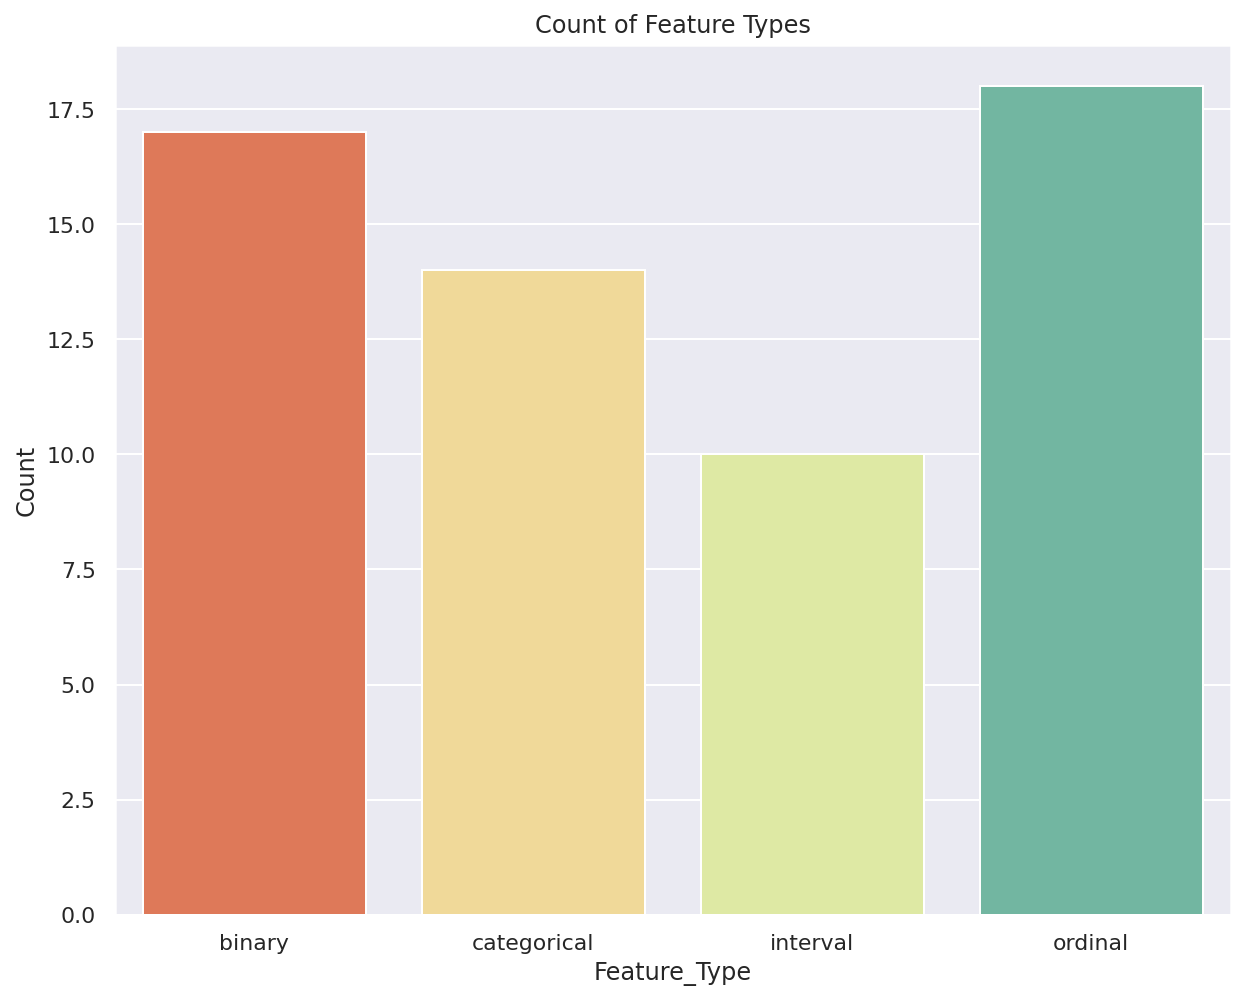

In [34]:
plt.figure(figsize=(10, 8))
plt.title('Count of Feature Types')
sns.barplot(ft_cnt['Feature_Type'], ft_cnt.Count, palette='Spectral')

**Exploratory Data Visualization**.

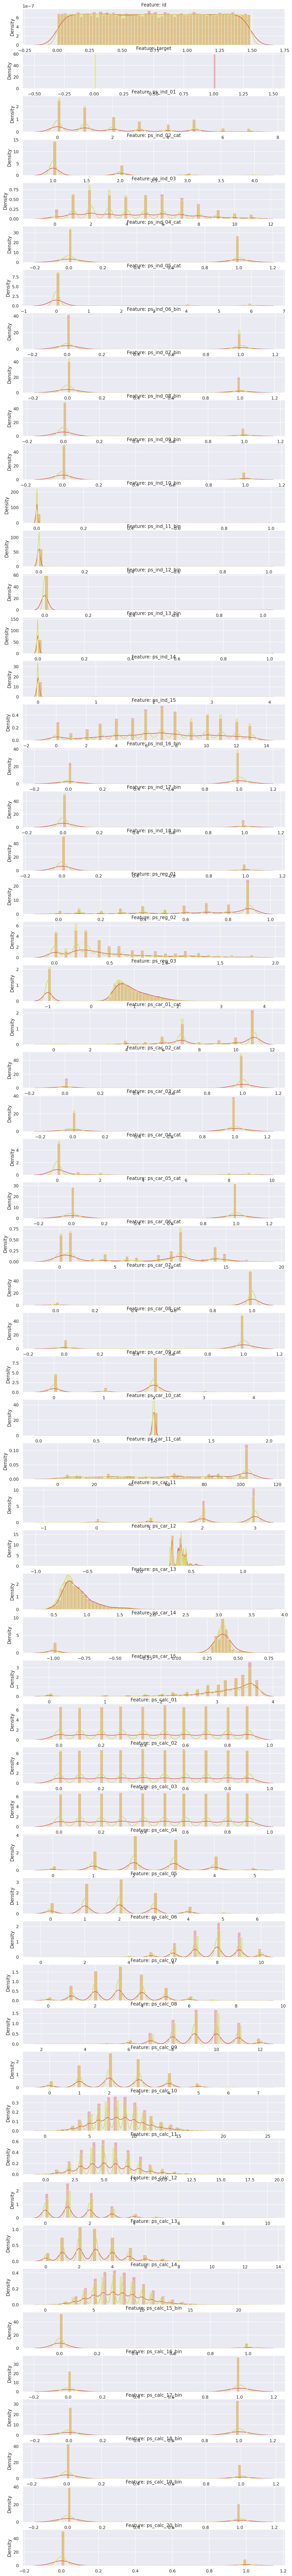

In [35]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12, 30*4))

features = train.iloc[:, 0:59].columns
gs = gridspec.GridSpec(59, 1)

for i, feature in enumerate(train[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[feature][train.target == 1], bins=60)
    sns.distplot(train[feature][train.target == 0], bins=60)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

- Categorical variables and the proportion of customers with `target = 1`

<Figure size 504x504 with 0 Axes>

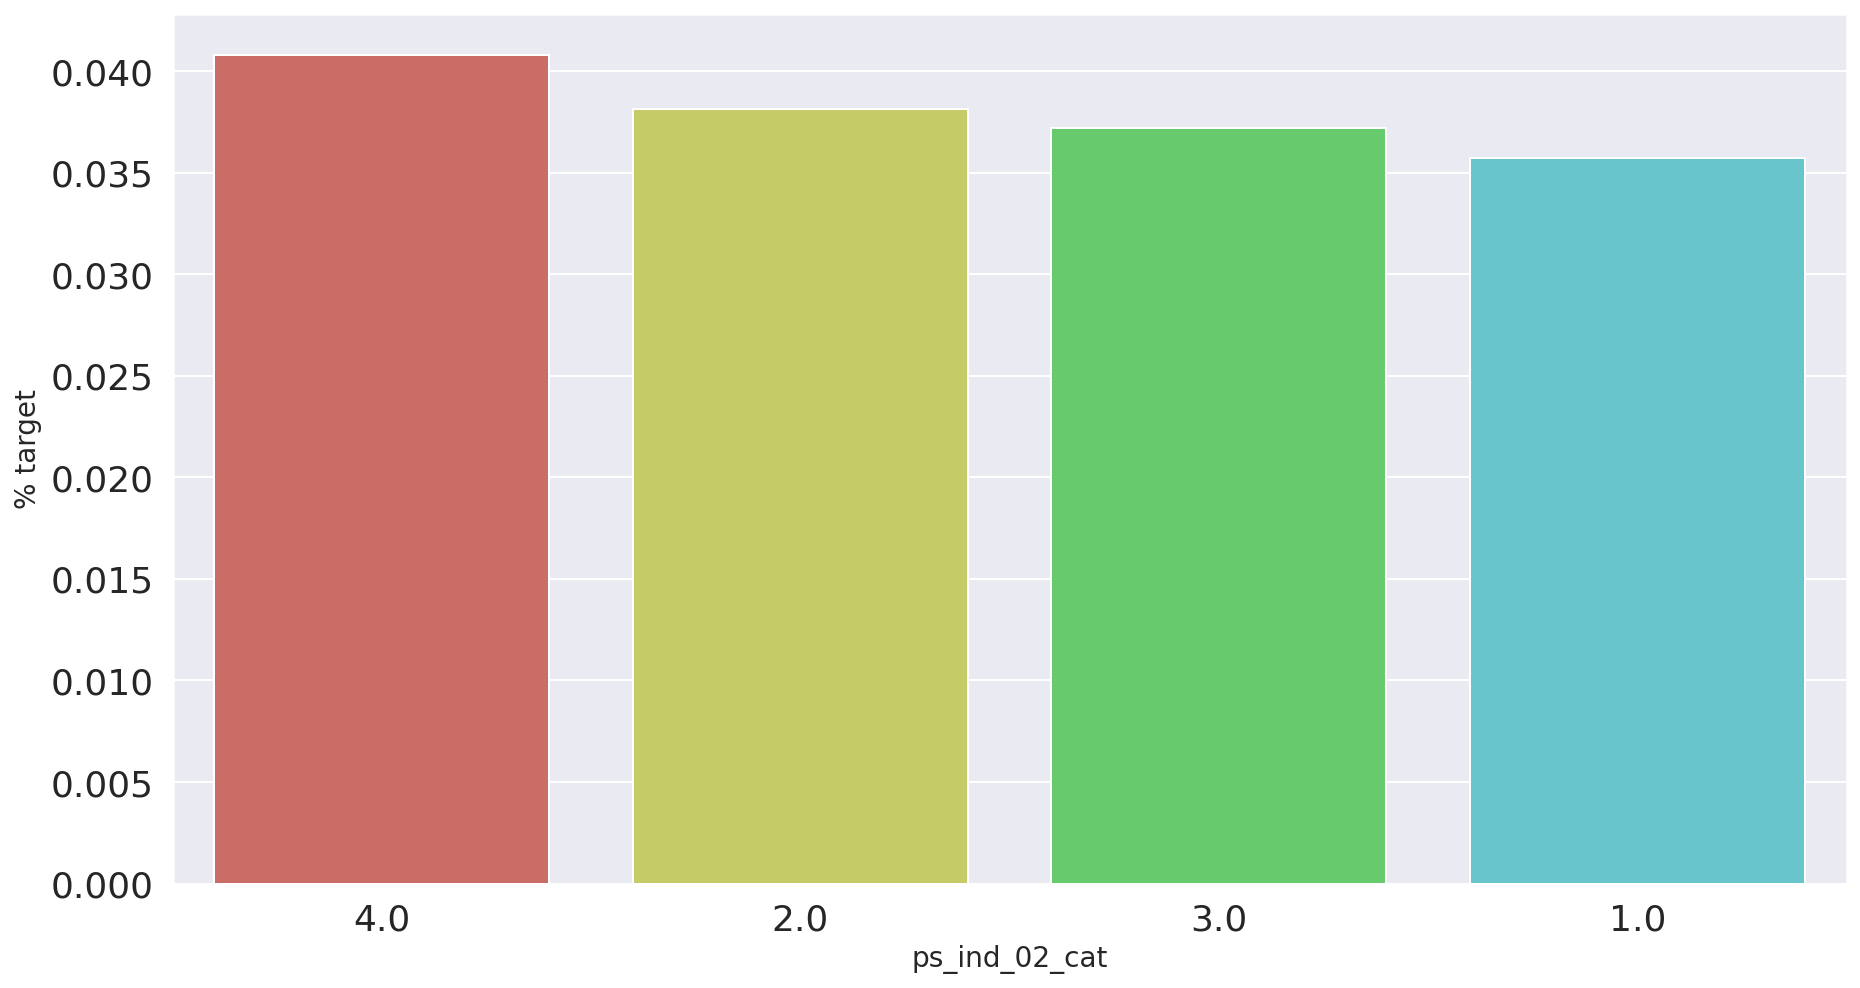

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

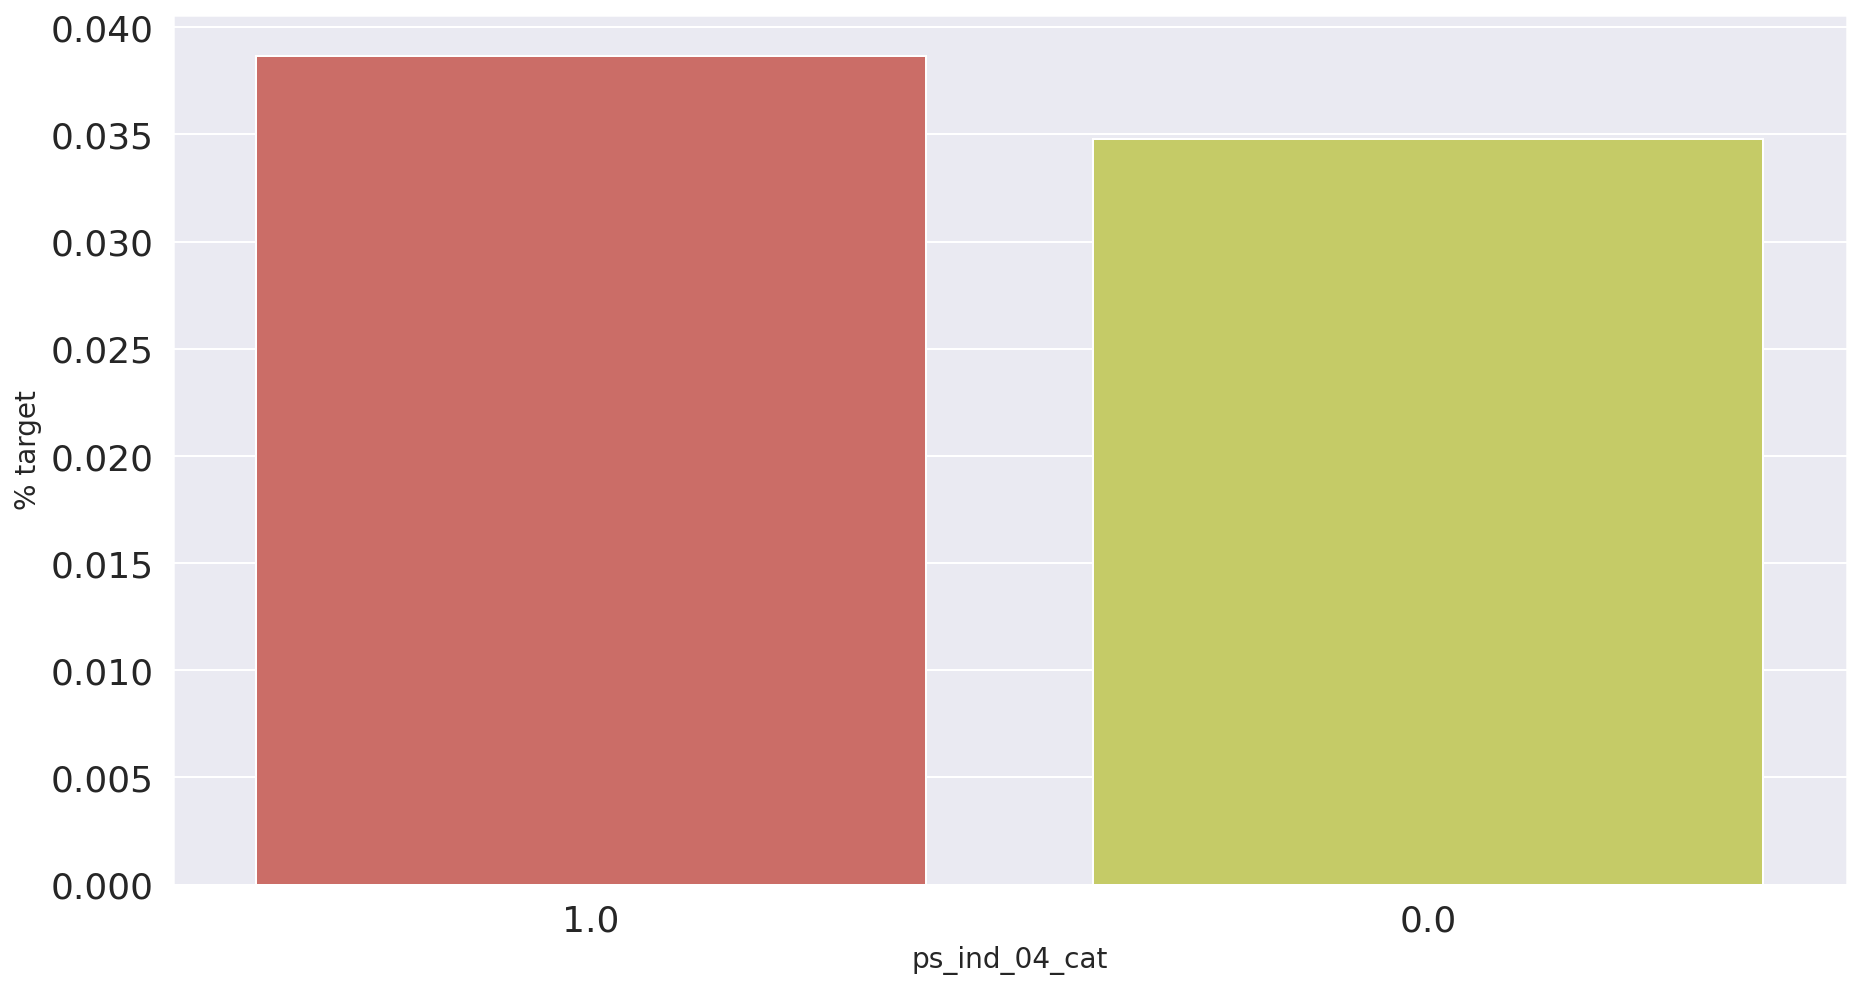

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

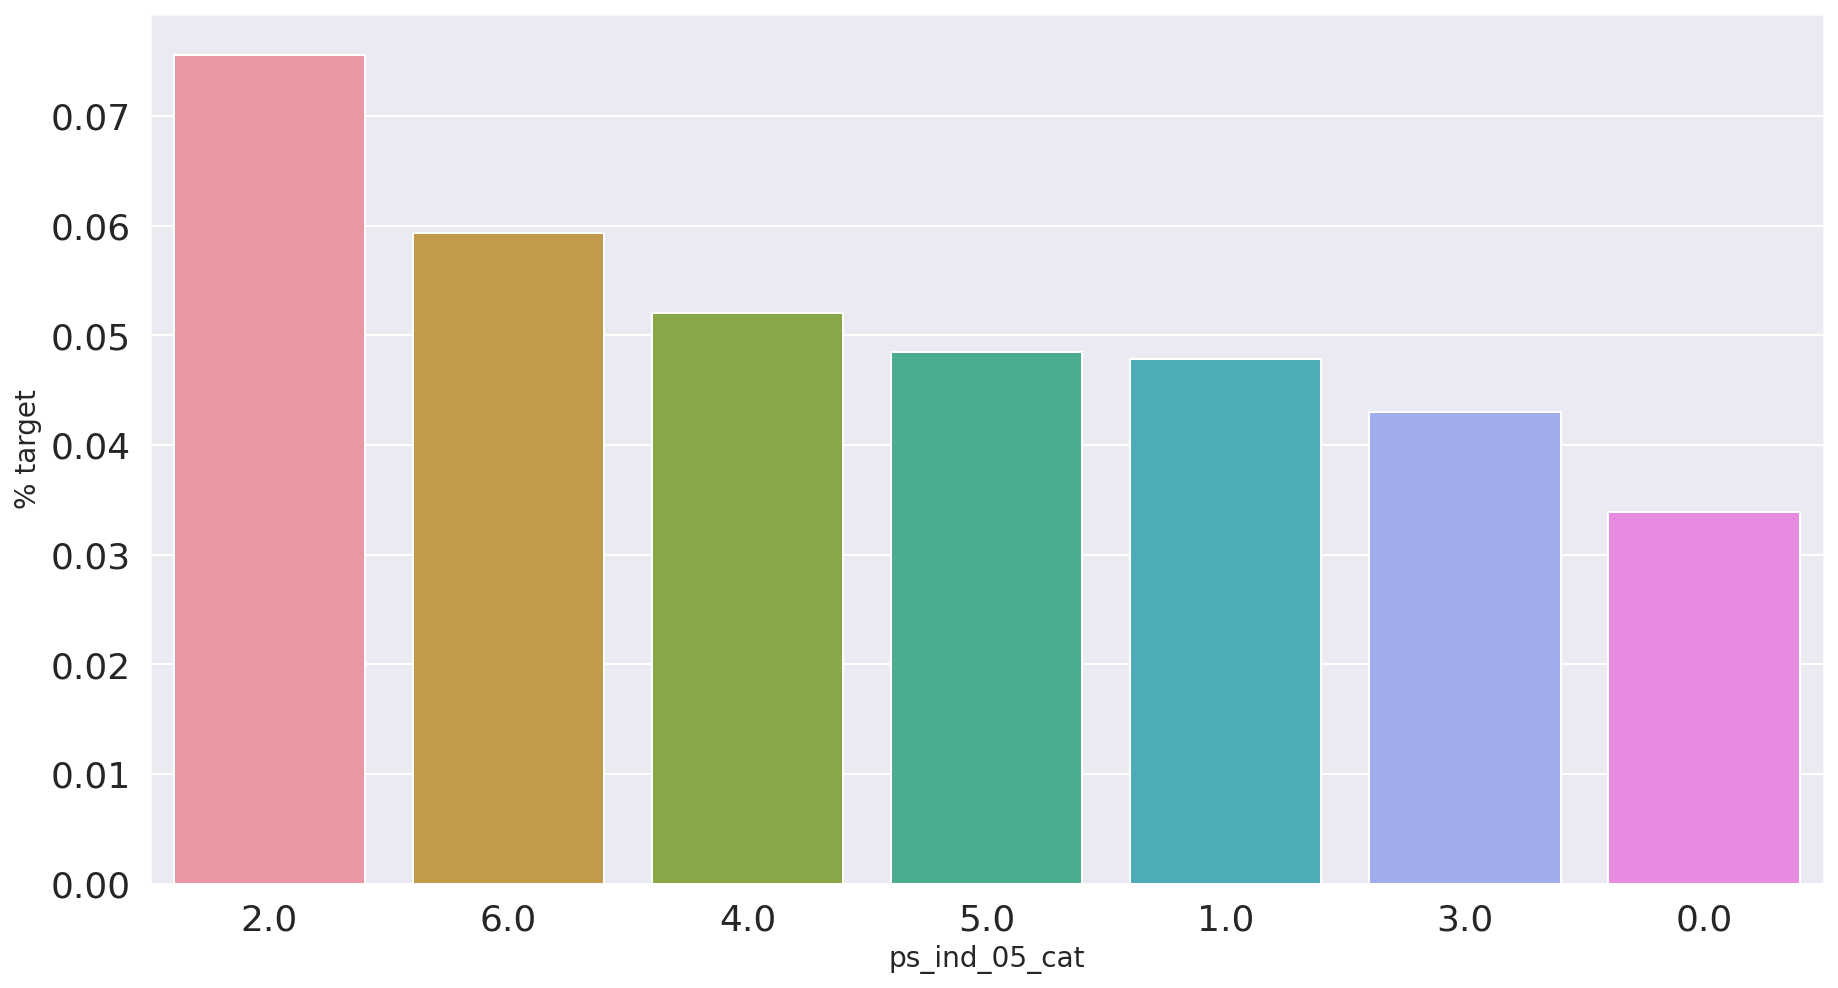

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

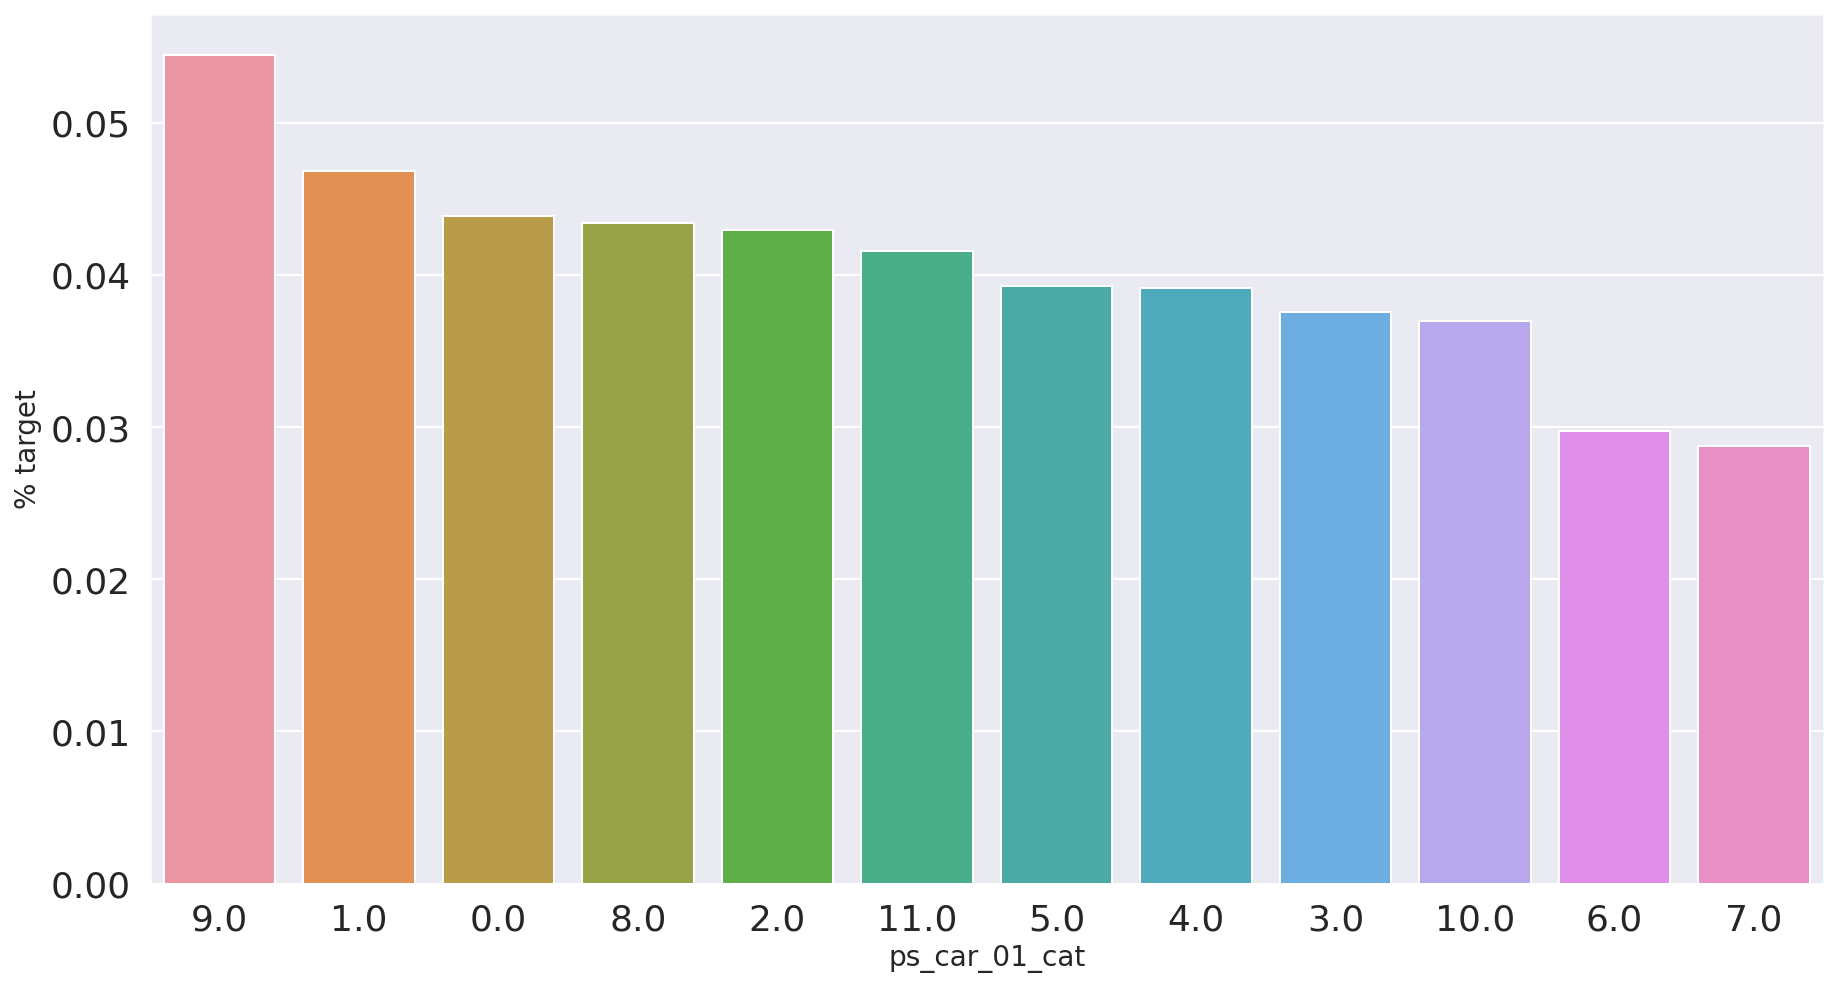

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

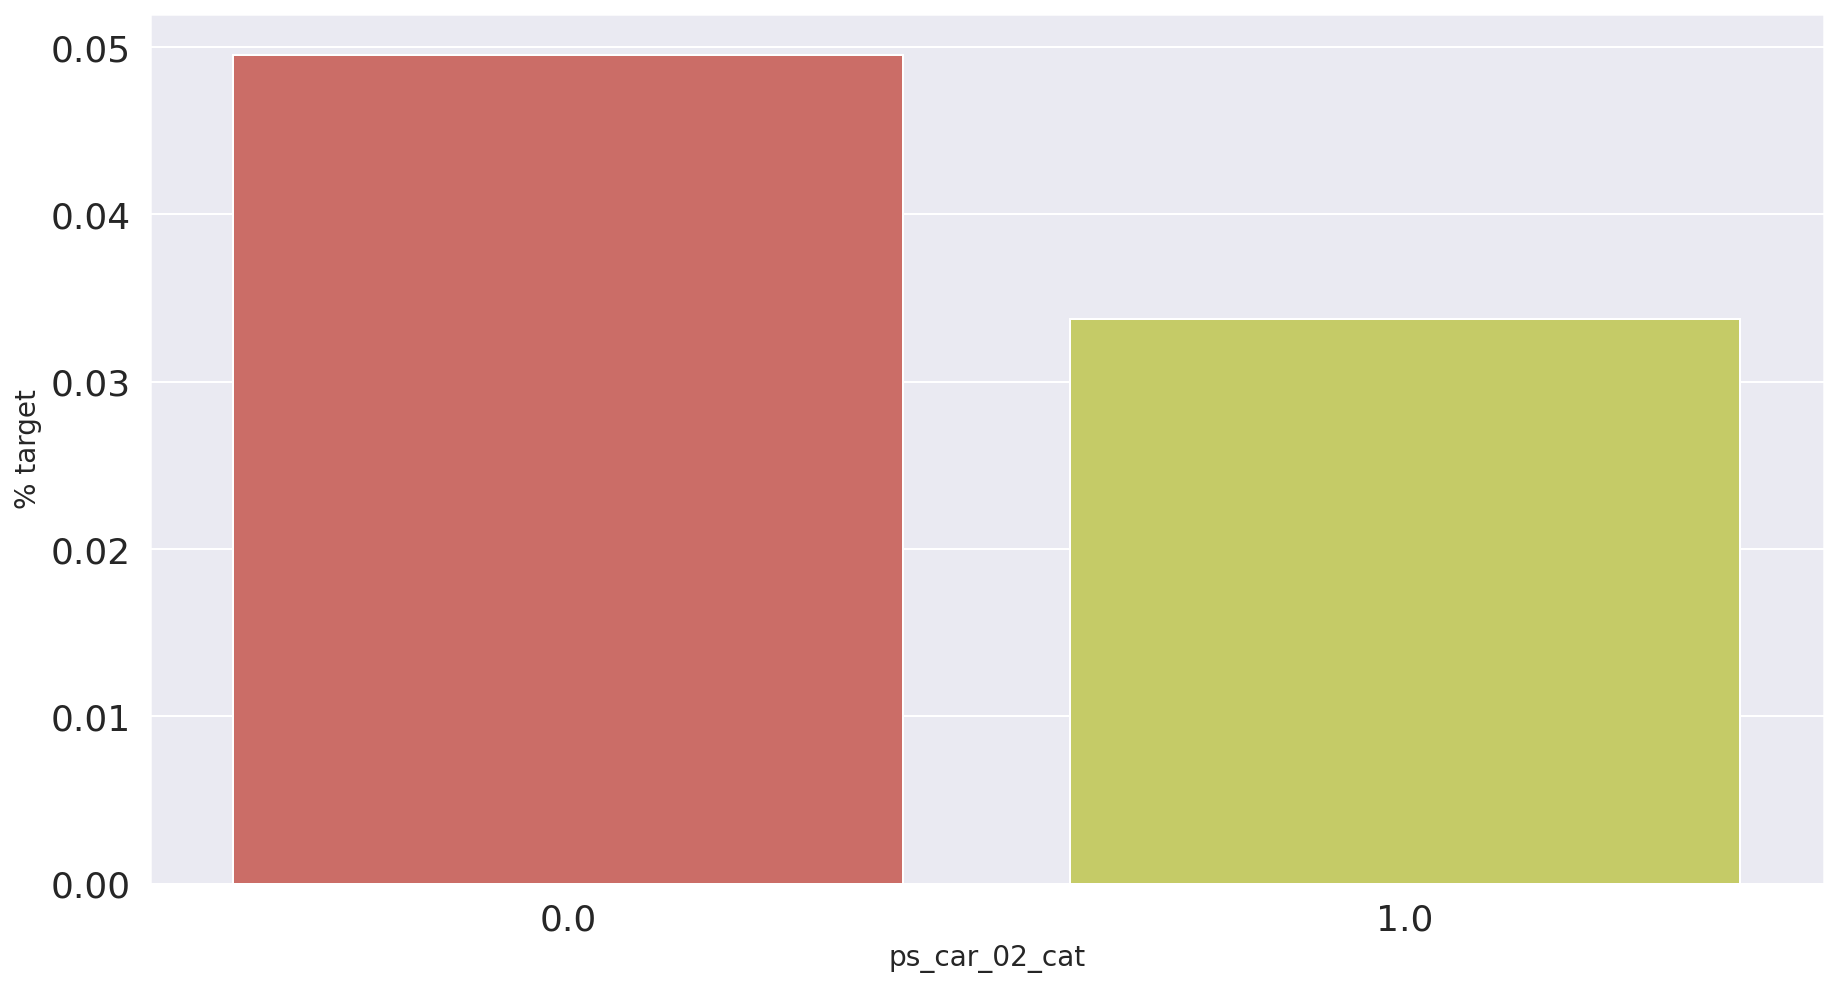

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

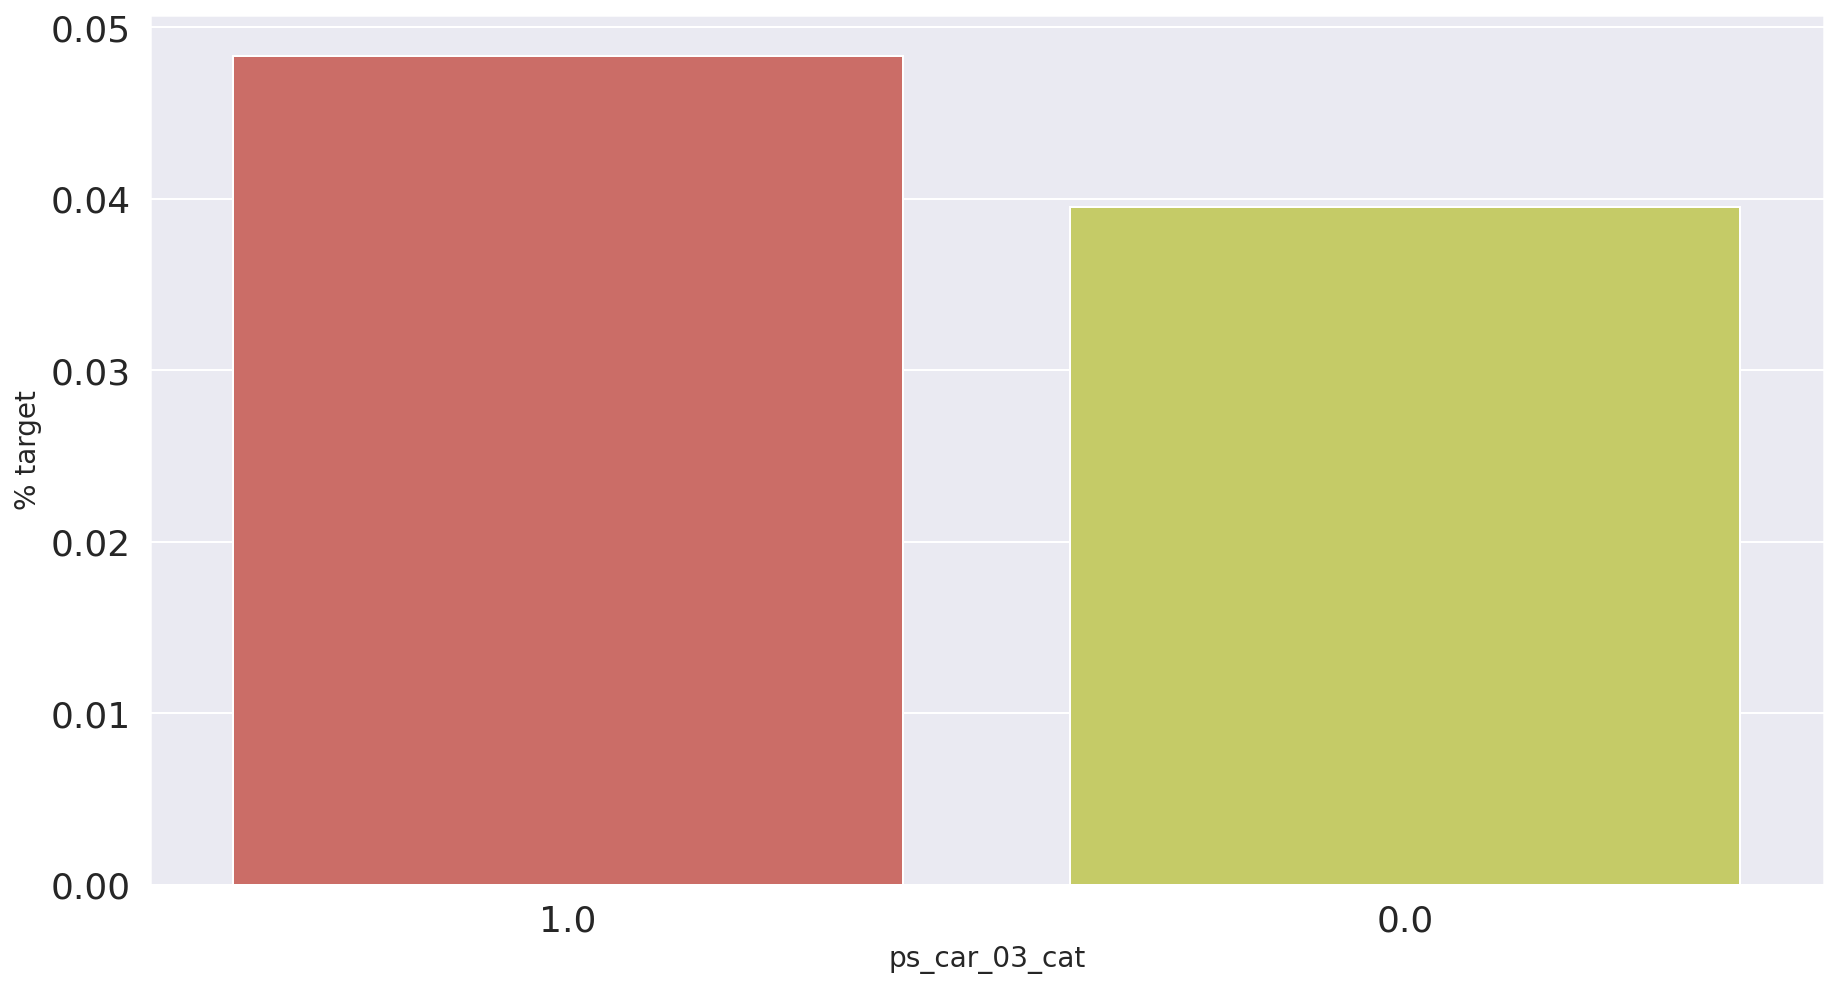

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

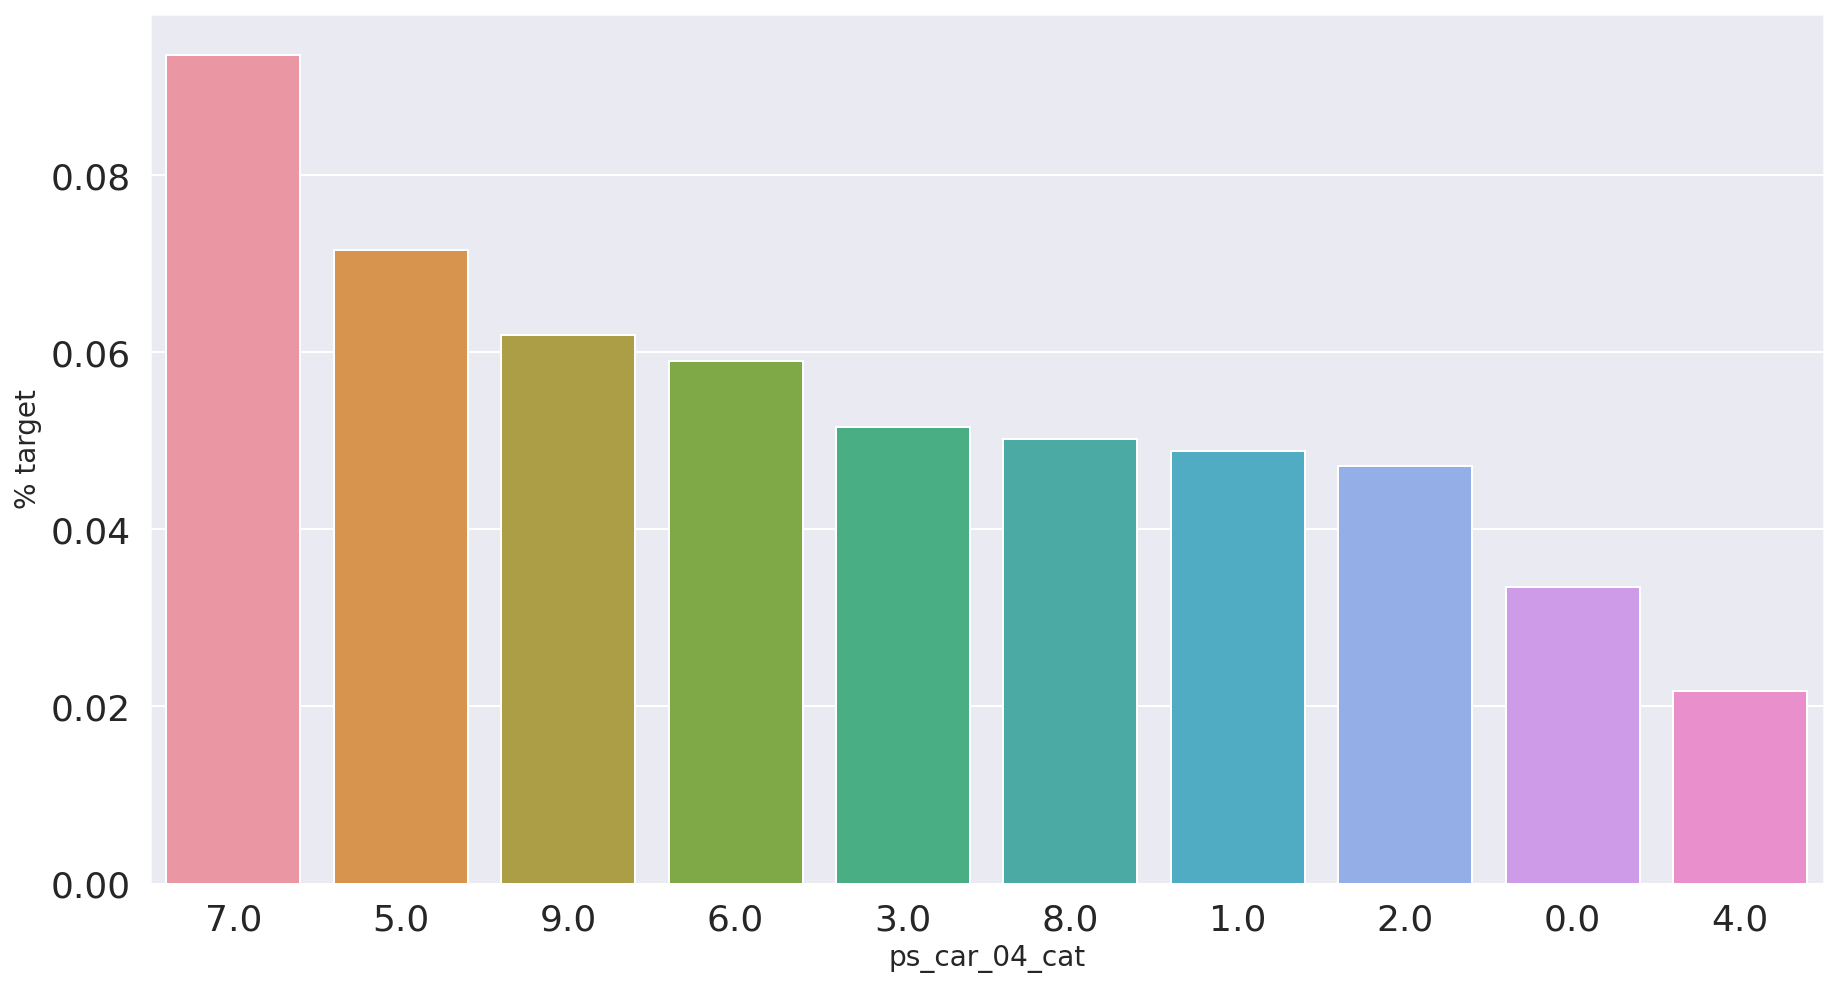

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

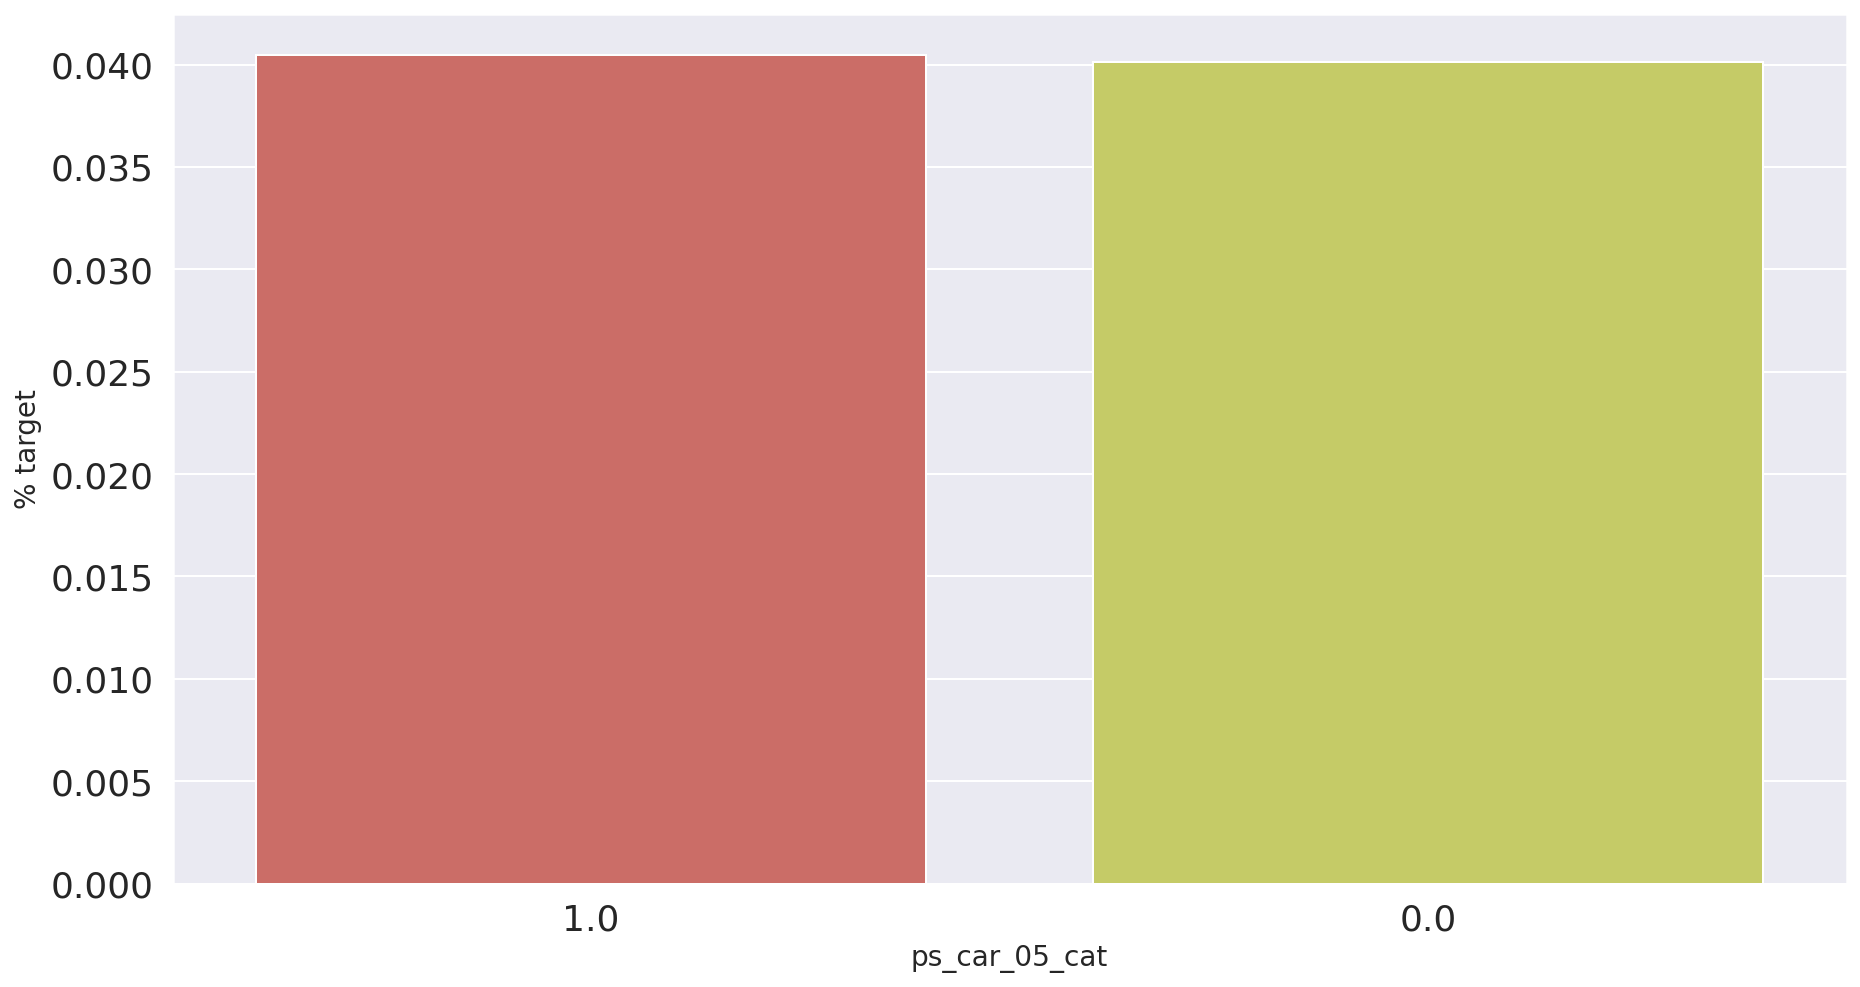

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

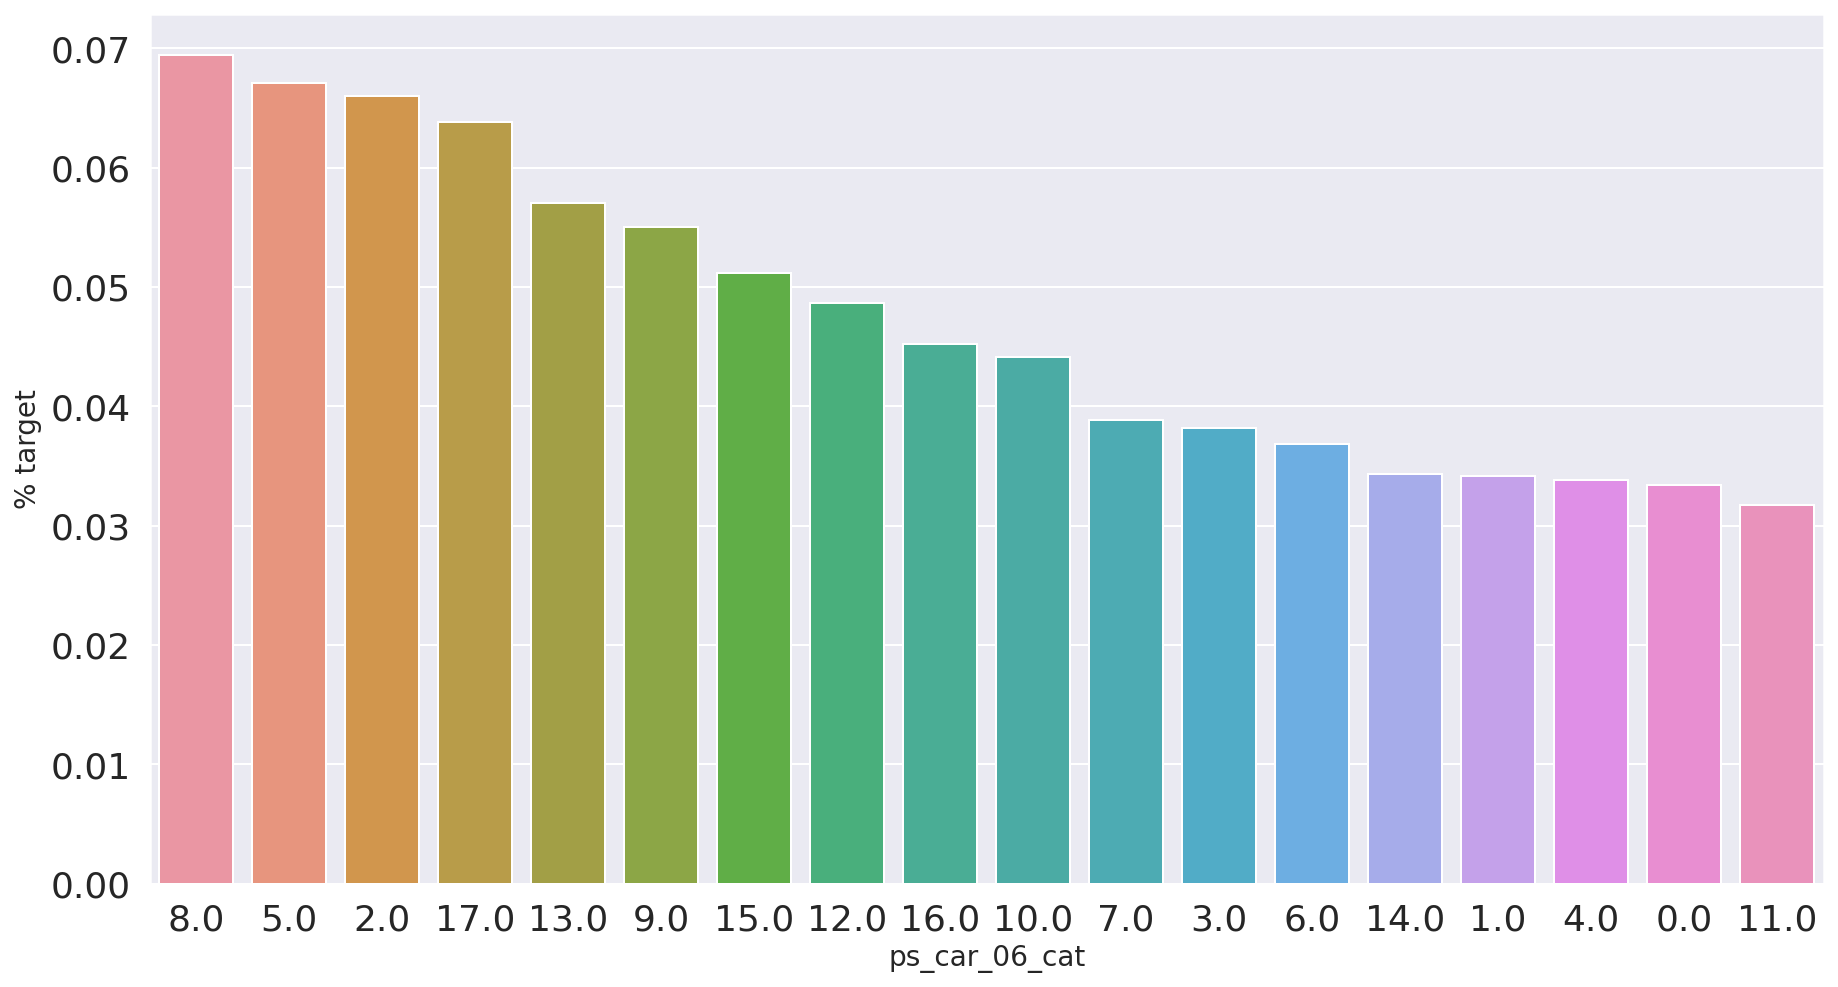

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

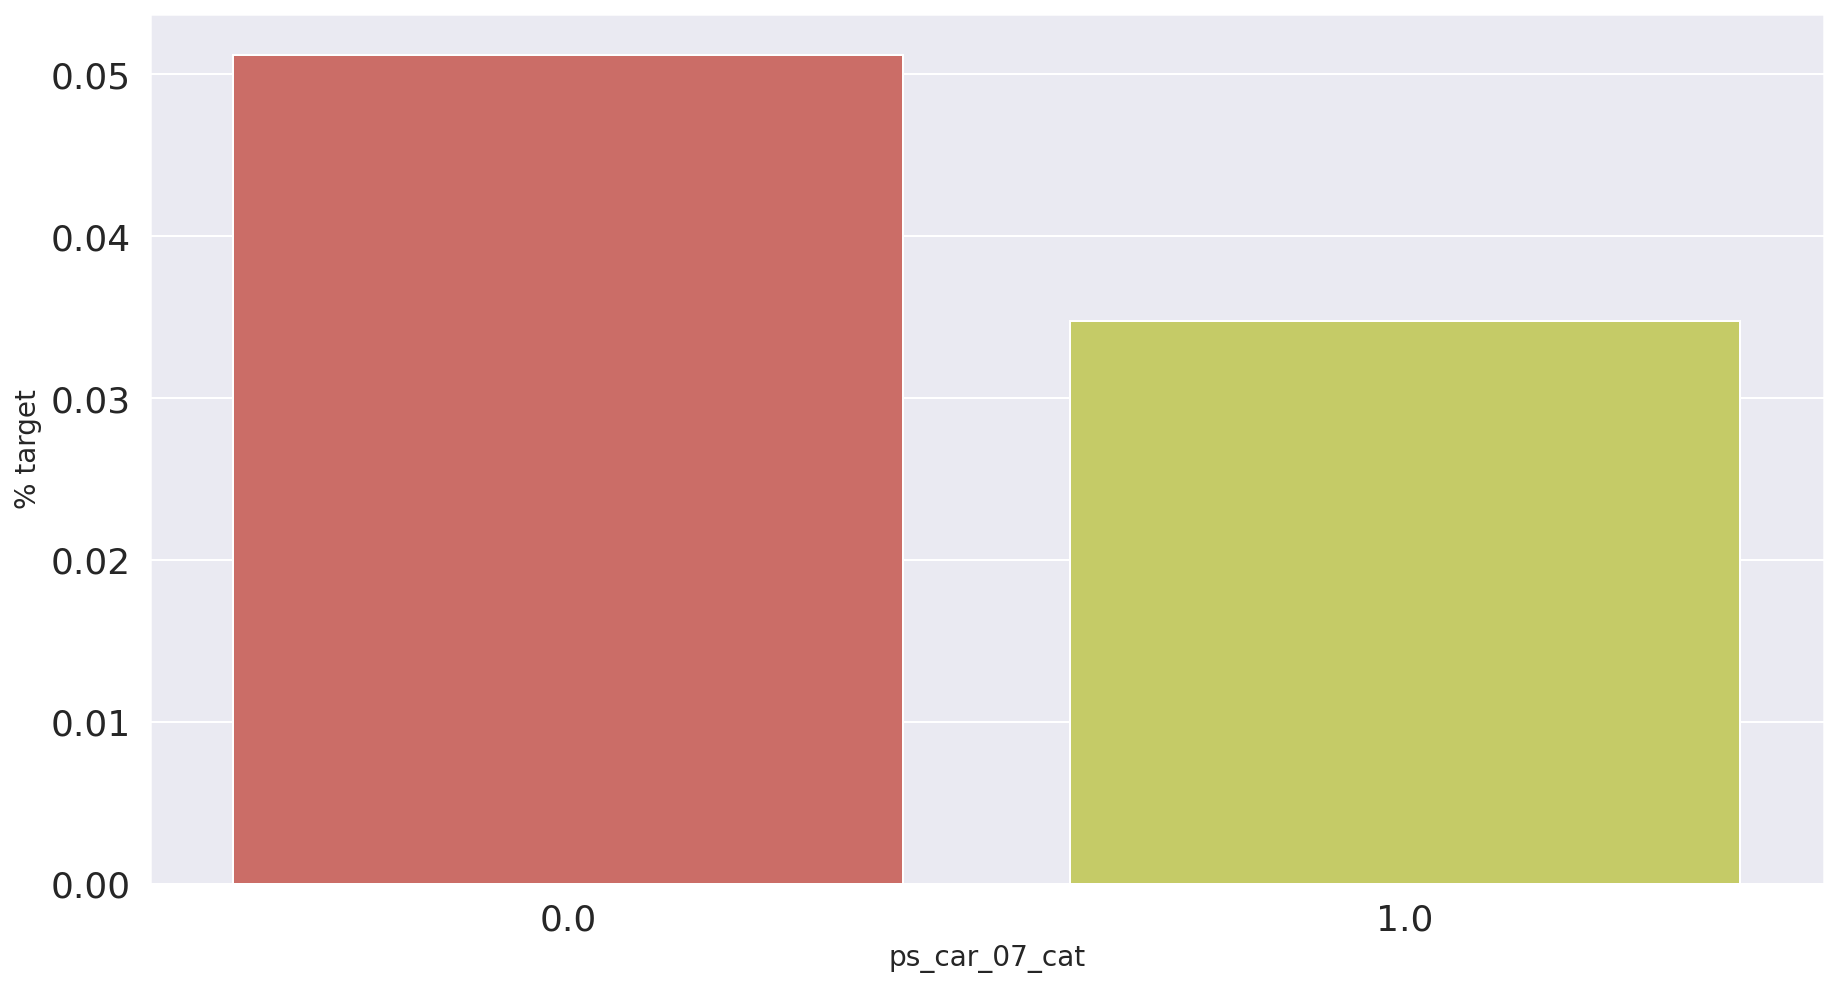

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

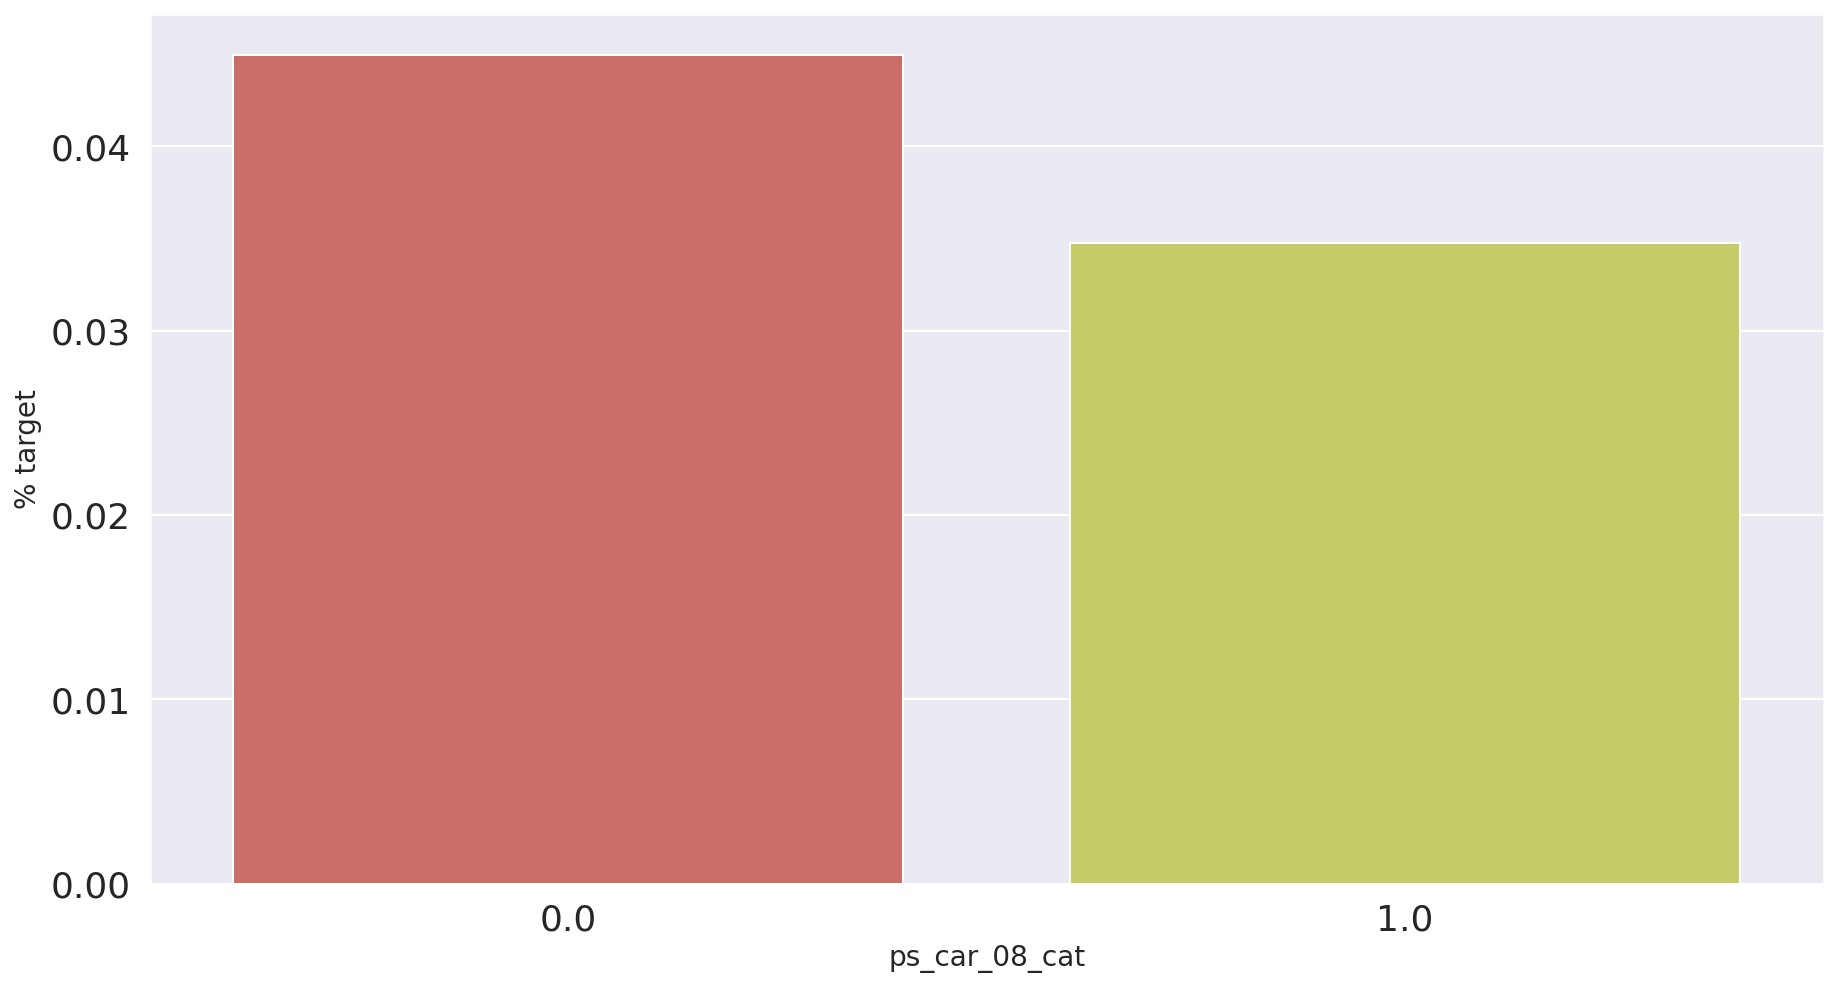

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

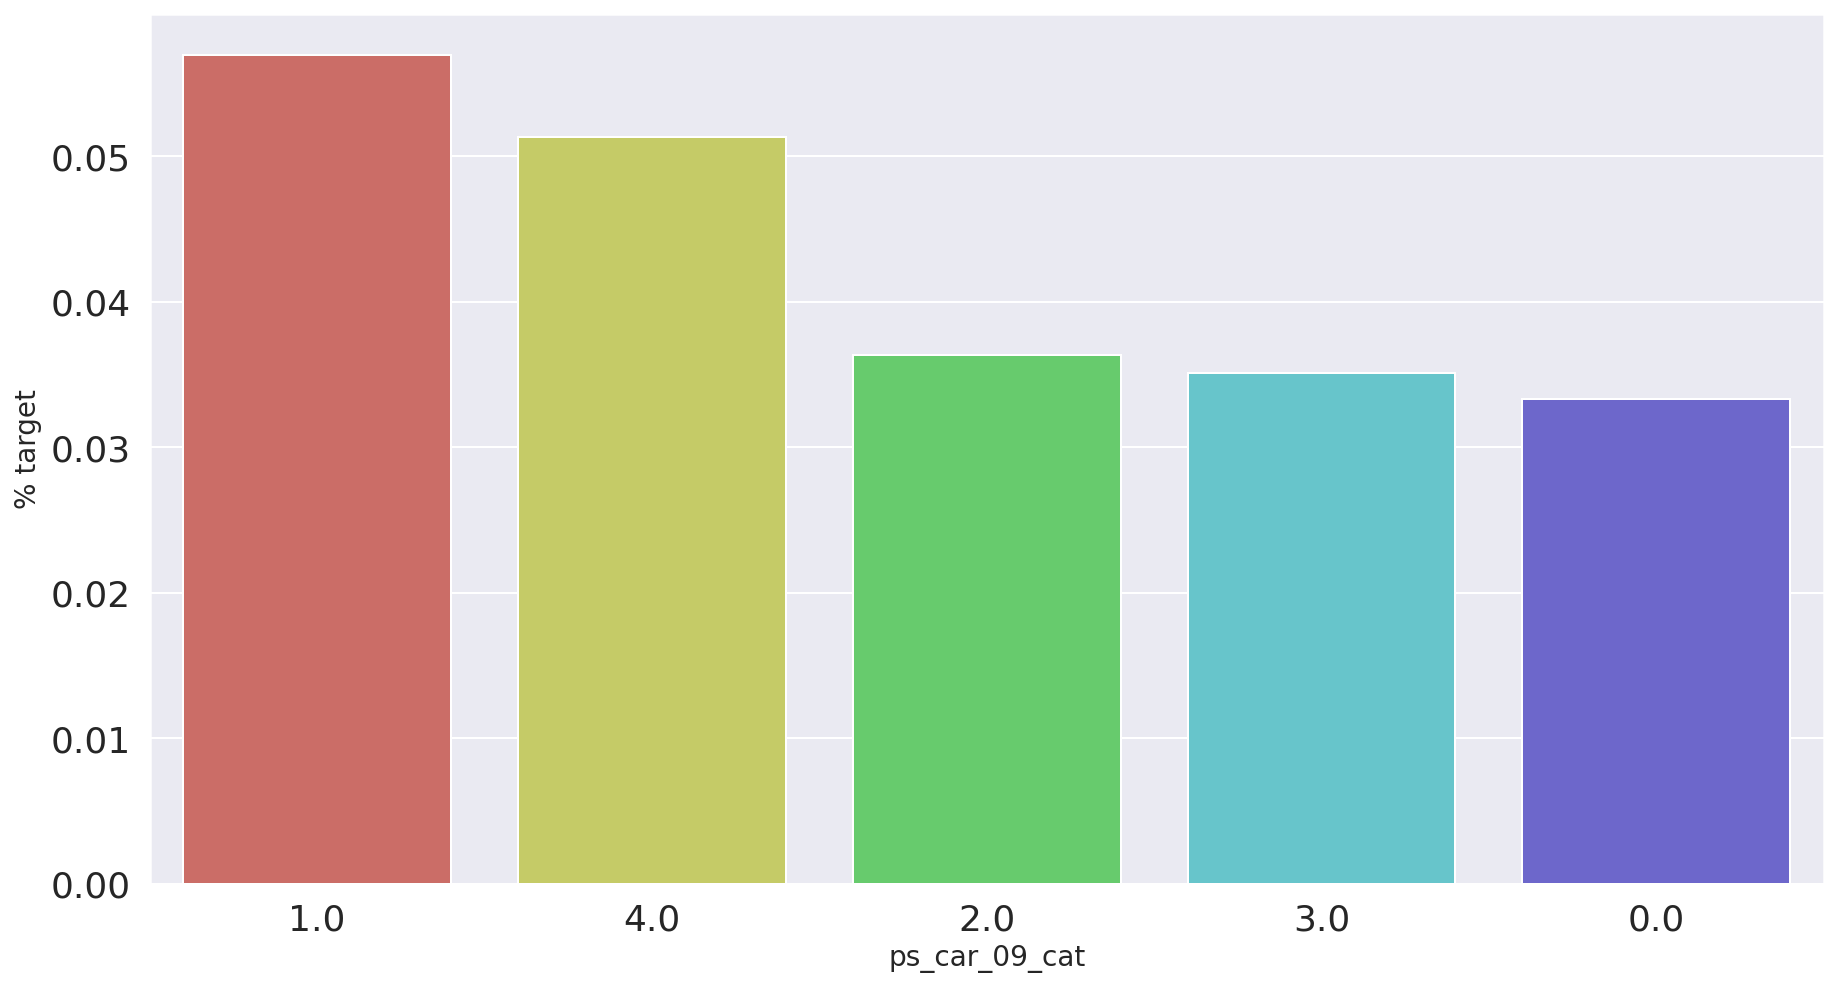

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

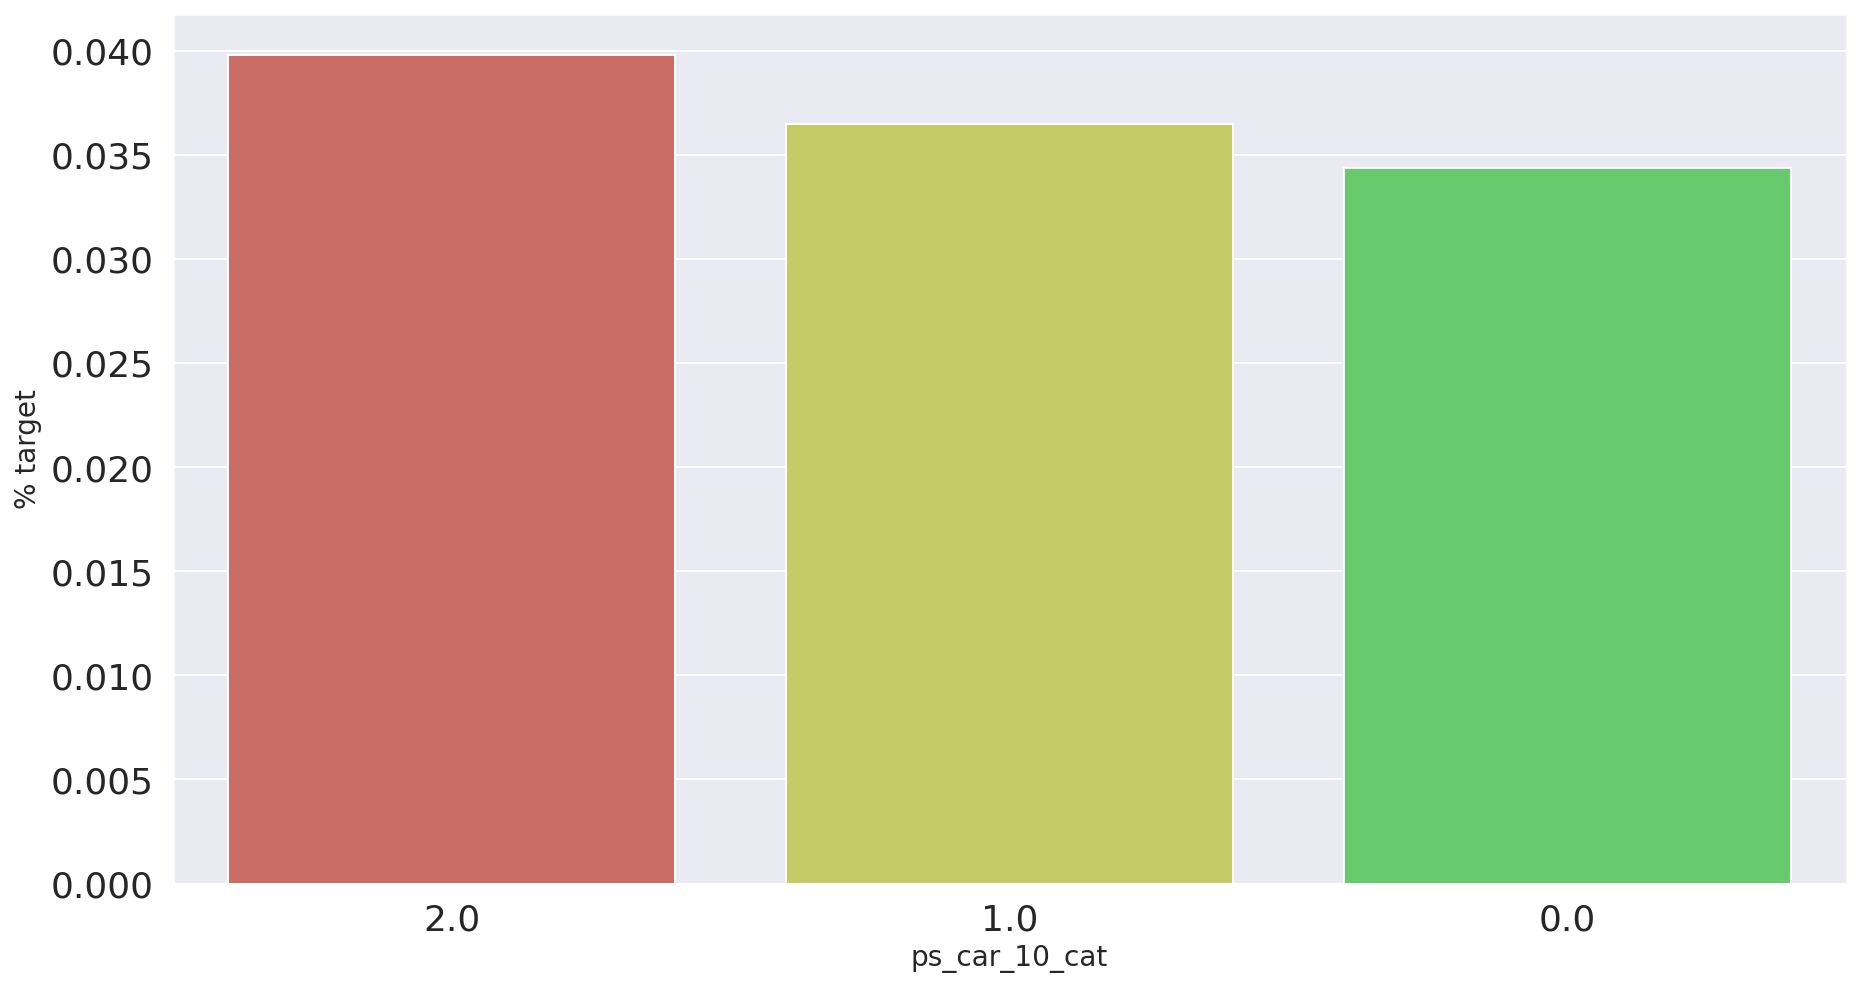

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

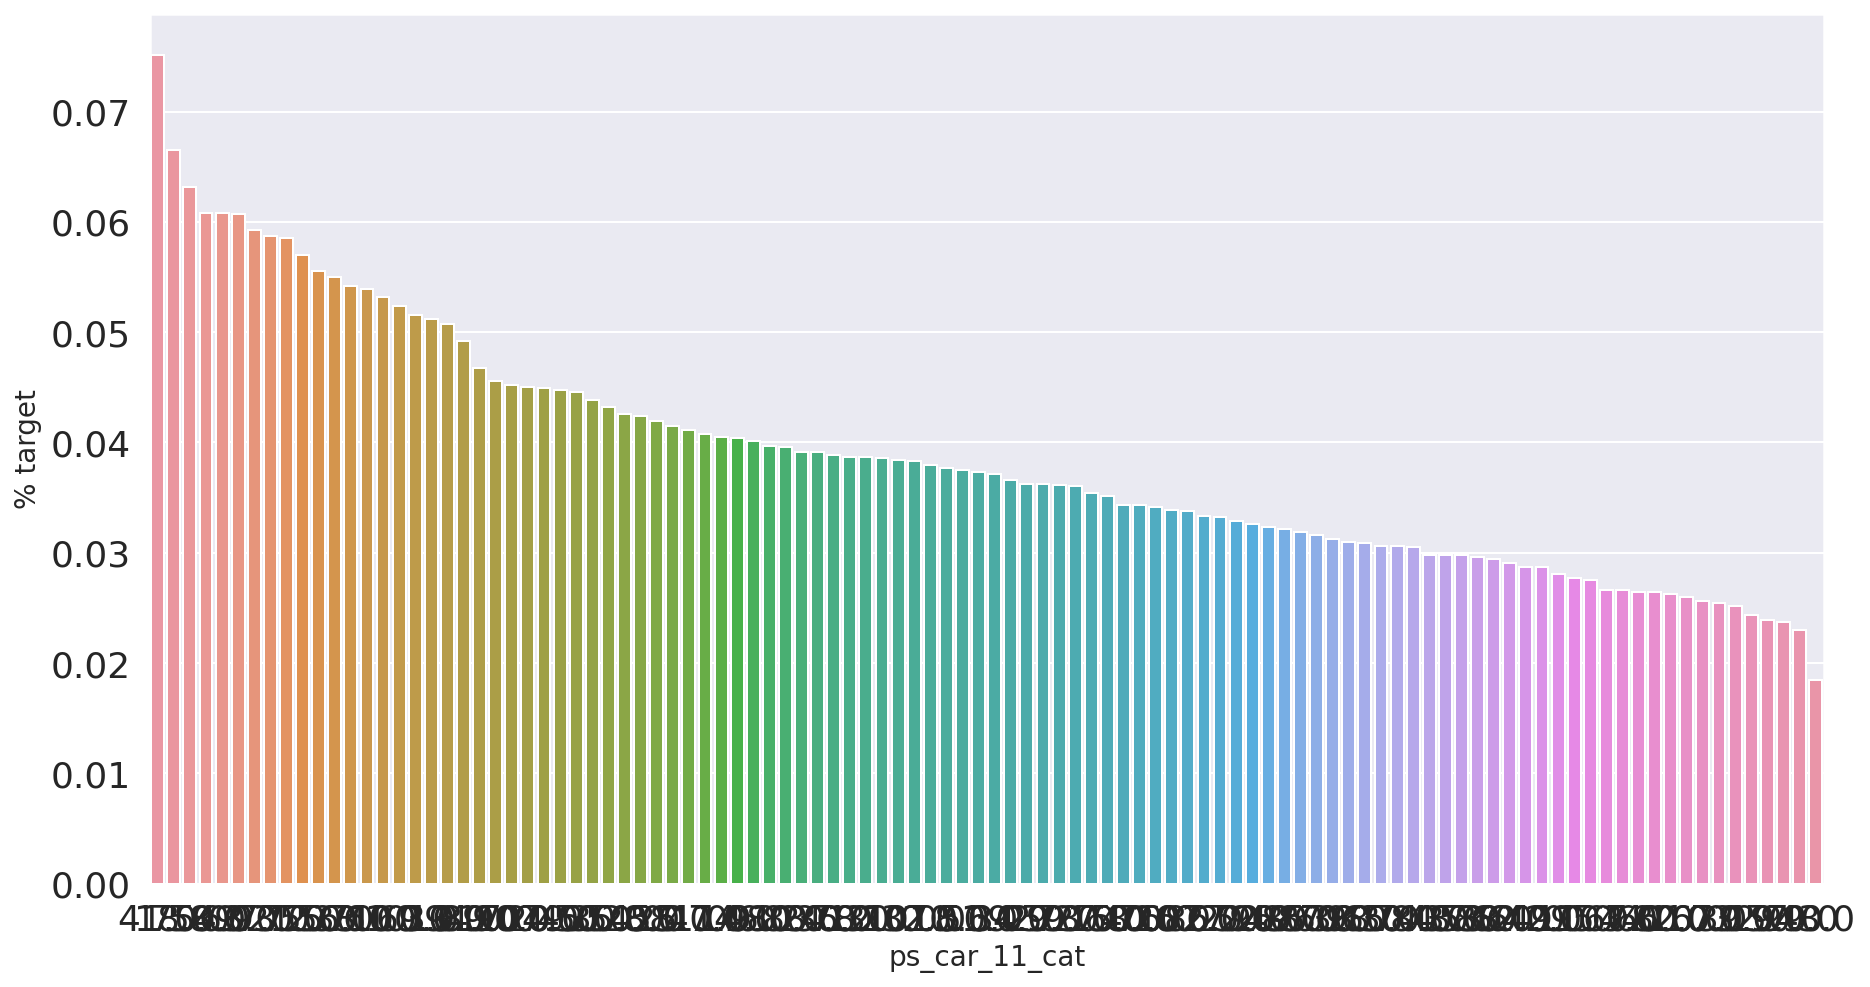

<Figure size 504x504 with 0 Axes>

In [36]:
v = meta[(meta.Feature_Type == 'categorical') & (meta.Keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 8))

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=14)
    plt.xlabel(f, fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()
    plt.tight_layout()